<a href="https://colab.research.google.com/github/DSilvia08/Para-entregar/blob/main/TareaMetodo_de_composici%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Método de Composición

##Ejemplo
$$f(x)=e^{-|2x|}$$

1. $f(x)\geq 0$ \
Propiedad de la función exponencial
$$e^y$$
es siempre positiva para cualquier valor real de $y\in \mathbb{R}$. Entonces tenemos
$$ y= -|2x|\geq 0$$
$$-|2x|\geq 0$$
$$|x|\geq 0$$
Es equivalente a que $x$ puede ser negativo o positivo o igual a 0
$$x\leq 0 \cup x\geq 0$$
es decir, $x$ puede tomar cualquier valor real, $x\in \mathbb{R}$. \
$$\therefore f(x)\geq 0$$
2. Demostrar que $f(x)$ es una función de densidad
$$\int_{-∞}^∞f(x)dx=1 $$
$$\int_{-∞}^∞e^{-|2x|}dx=1 $$
$$\int_{-∞}^∞e^{-|2x|}dx=\int_{-∞}^0e^{2x}dx\ +\int_0^{∞}e^{-2x}dx=$$
$$\int_{-∞}^0e^{2x}dx=\frac{1}{2}\int_{-∞}^0e^udx=\frac{1}{2} e^u=[\frac{1}{2}e^{2x}]_{-∞}^0=\frac{1}{2}$$
$$\int_0^{∞}e^{-2x}dx=-\frac{1}{2}\int_{-∞}^0e^udx=-\frac{1}{2} e^u=[-\frac{1}{2}e^{-2x}]_0^{∞}=0-(-\frac{1}{2})=\frac{1}{2}$$
$$\int_{-∞}^∞e^{-|2x|}dx=\frac{1}{2}+\frac{1}{2}=1 $$

In [9]:
#Importamos las librerías a ocupar
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
from math import e

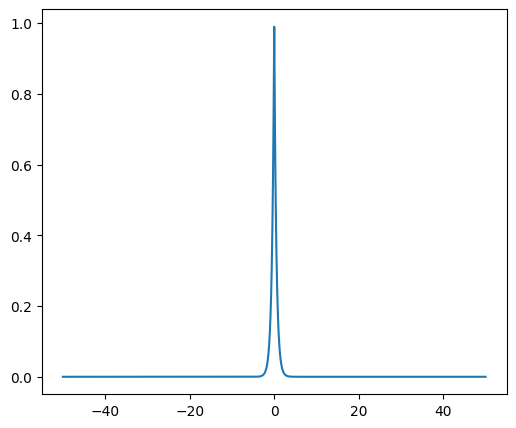

In [10]:
x=np.linspace(-50,50,10000) #rango en x de [-50,50]
y=e**(-abs(2*x)) #función f(x)
plt.figure(figsize=(6,5)) #Crear figura
plt.plot(x,y) #Graficar
plt.show()

###Pasos para el Método de composición
1. Dividir la distribución en sub áreas \
La división en subáreas se basa en el comportamiento del valor absoluto. Por lo tanto $f(x)$ puede dividirse en dos sub áreas. $A_1 \ y \ A_2$ \
Anteriormente se calculó su integral a lo largo de $(-∞,∞)$ igualmente acorde al comportamiento del valor absoluto, así:
$$A_1=A_2=\frac{1}{2}$$
2. Definir una distribución para cáda área
$$f_1\ y \ f_2$$
Como anteriormente se menciono $x$ puede ser negativo o positivo, entonces
$$f_1(x)=e^{-2x},\ cuando \ x>0$$
$$f_2(x)=e^{2x}, \ cuando \ x<0$$
3. Escribir $f(x)=A_1f_1+A_2f_2=1$
$$f(x)=\frac{1}{2}e^{-2x}+\frac{1}{2}e^{2x}$$
4. Obtener la distribución acumulada de las áreas
$$F(x) = \int_{-∞}^{x}f(s)ds$$
$$F_1(x)\int_{-∞}^x e^{2s}ds=[\frac{1}{2}e^{2s}]_{-∞}^0=\frac{1}{2} e^{2x}$$
La constante de acumulación $F_1(0)=\frac{1}{2}$
$$F_2(x)=F_1(0)+ \int_0^{∞}e^{-2s}ds=F_1(0)+[-\frac{1}{2}e^{-2s}]_0^{∞}=F_1(0)+0-(-\frac{1}{2}e^{-2s})=\frac{1}{2}+\frac{1}{2} e^{-2x}$$
$$F(x)\begin{cases}
\frac{1}{2} e^{2x} \ &\text{si } x<0 \\
\frac{1}{2}+\frac{1}{2} e^{-2x} \ &\text{si } x\geq 0 \\
\end{cases}$$

5. Generar $R_1,R_2\sim U(0,1)$. \
$R_1$ sirve para elegir si se genera $x\sim f_1$ o $x\sim f_2$ \
Luego se usa $R_2$ para generar $f_1$ o $f_2$, en este caso por transformada inversa \

Resolver $F_1(x)=R$
$$\frac{1}{2}e^{2x}=R$$
$$x=\frac{ln(2R)}{2}$$
Y para $F_2(x)=R$
$$\frac{1}{2}+\frac{1}{2} e^{-2x}=R$$
$$x=\frac{ln(1-2R)}{2}$$
El eje donde se tomará los intervalos, es en el eje $y$, es decir de $[0,1]$. Quedando
$$F^{-1}(u)\begin{cases}
\frac{ln(2u)}{2} \ &\text{si } 0 \leq x < \frac{1}{2} \\
-\frac{ln(1-2u)}{2} \ &\text{si } \frac{1}{2} \leq x \leq 1 \\
\end{cases}$$

In [43]:
def F_u(n) : #Devuelve una lista con los valores de la función inversa
 lista1=[]
 for i in range(n):
  u_1=rnd.random()#Generar dos números aleatorios U(0,1)
  u_2=rnd.random()
  if 0<u_1<1/2: #intervalo de [0,1/2)
   x=(np.log(2*u_2))/2
   lista1.append(x)
  else: #intervalo de [1/2,1]
   x=-np.log((2*u_1)-1)/2
   lista1.append(x)
 return lista1

In [44]:
G=F_u(10000) #Manda a llamar la función con n=10000

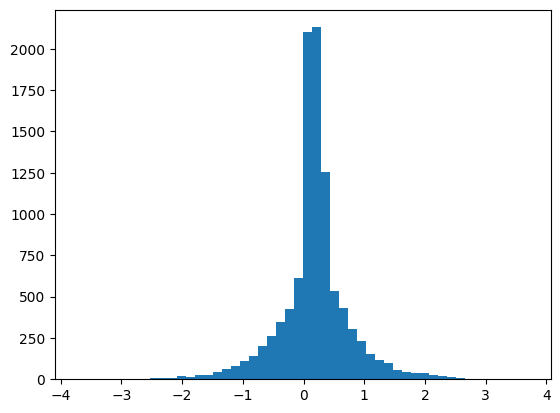

In [45]:
plt.hist(G,bins=50) #Histograma de los datos
plt.show()

In [46]:
def cdf(G): #Función de distribución acumulada
 n=len(G)
 x=np.sort(G) #Ordenamos los datos
 y=np.arange(0,n)/n #Genera un array de numeros enteros de 0 a n-1
                    #El resultante se divide por n, para normalizar los valores
 return x,y

In [47]:
x,y=cdf(G)

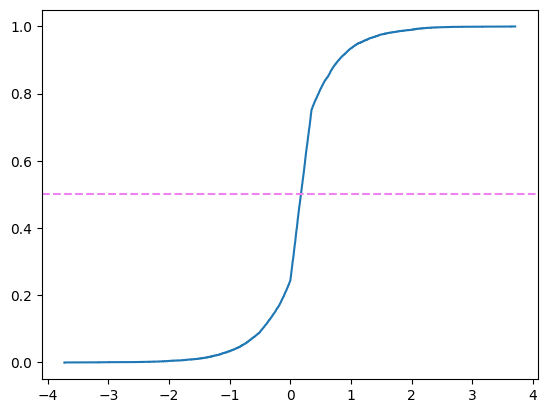

In [48]:
plt.step(x,y) #Gráfica de la distribución acumulada
plt.axhline(y=1/2, color='violet', linestyle='--') #valor extremo del primer intervalo
plt.show()